In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import warnings
import random
%matplotlib inline

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/Facial_exp/images/images/train/'
VAL_DIR  = '/content/drive/MyDrive/Facial_exp/images/images/validation/'

In [ ]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [ ]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head(5)

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,C:/Users/tulas/Downloads/FacialEmotions_datase...,sad
1,C:/Users/tulas/Downloads/FacialEmotions_datase...,happy
2,C:/Users/tulas/Downloads/FacialEmotions_datase...,fear
3,C:/Users/tulas/Downloads/FacialEmotions_datase...,fear
4,C:/Users/tulas/Downloads/FacialEmotions_datase...,angry


In [ ]:
val = pd.DataFrame()
val['image'], val['label'] = load_dataset(VAL_DIR)
val.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,C:/Users/tulas/Downloads/FacialEmotions_datase...,angry
1,C:/Users/tulas/Downloads/FacialEmotions_datase...,angry
2,C:/Users/tulas/Downloads/FacialEmotions_datase...,angry
3,C:/Users/tulas/Downloads/FacialEmotions_datase...,angry
4,C:/Users/tulas/Downloads/FacialEmotions_datase...,angry


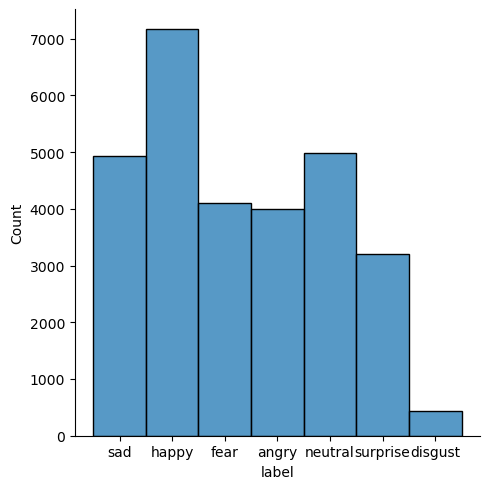

In [ ]:

sns.displot(train['label'])
#sns.countplot(x=train,data=label, palette=['b','g'])


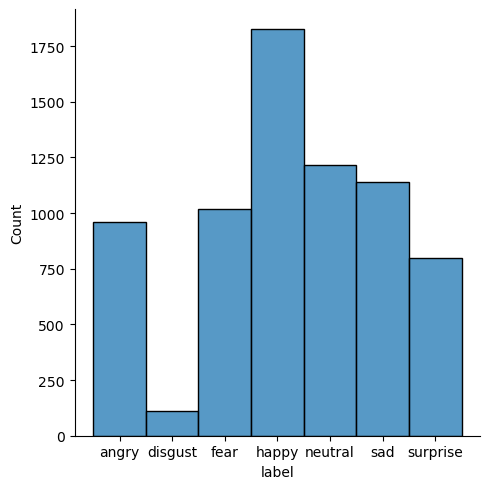

In [ ]:
sns.displot(val['label'])

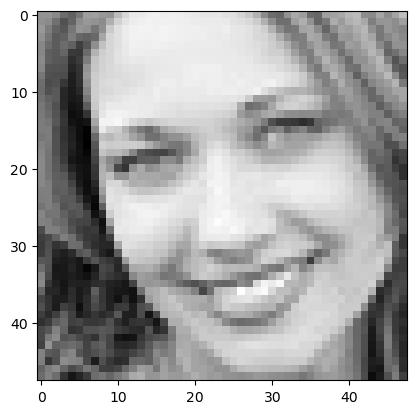

In [ ]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

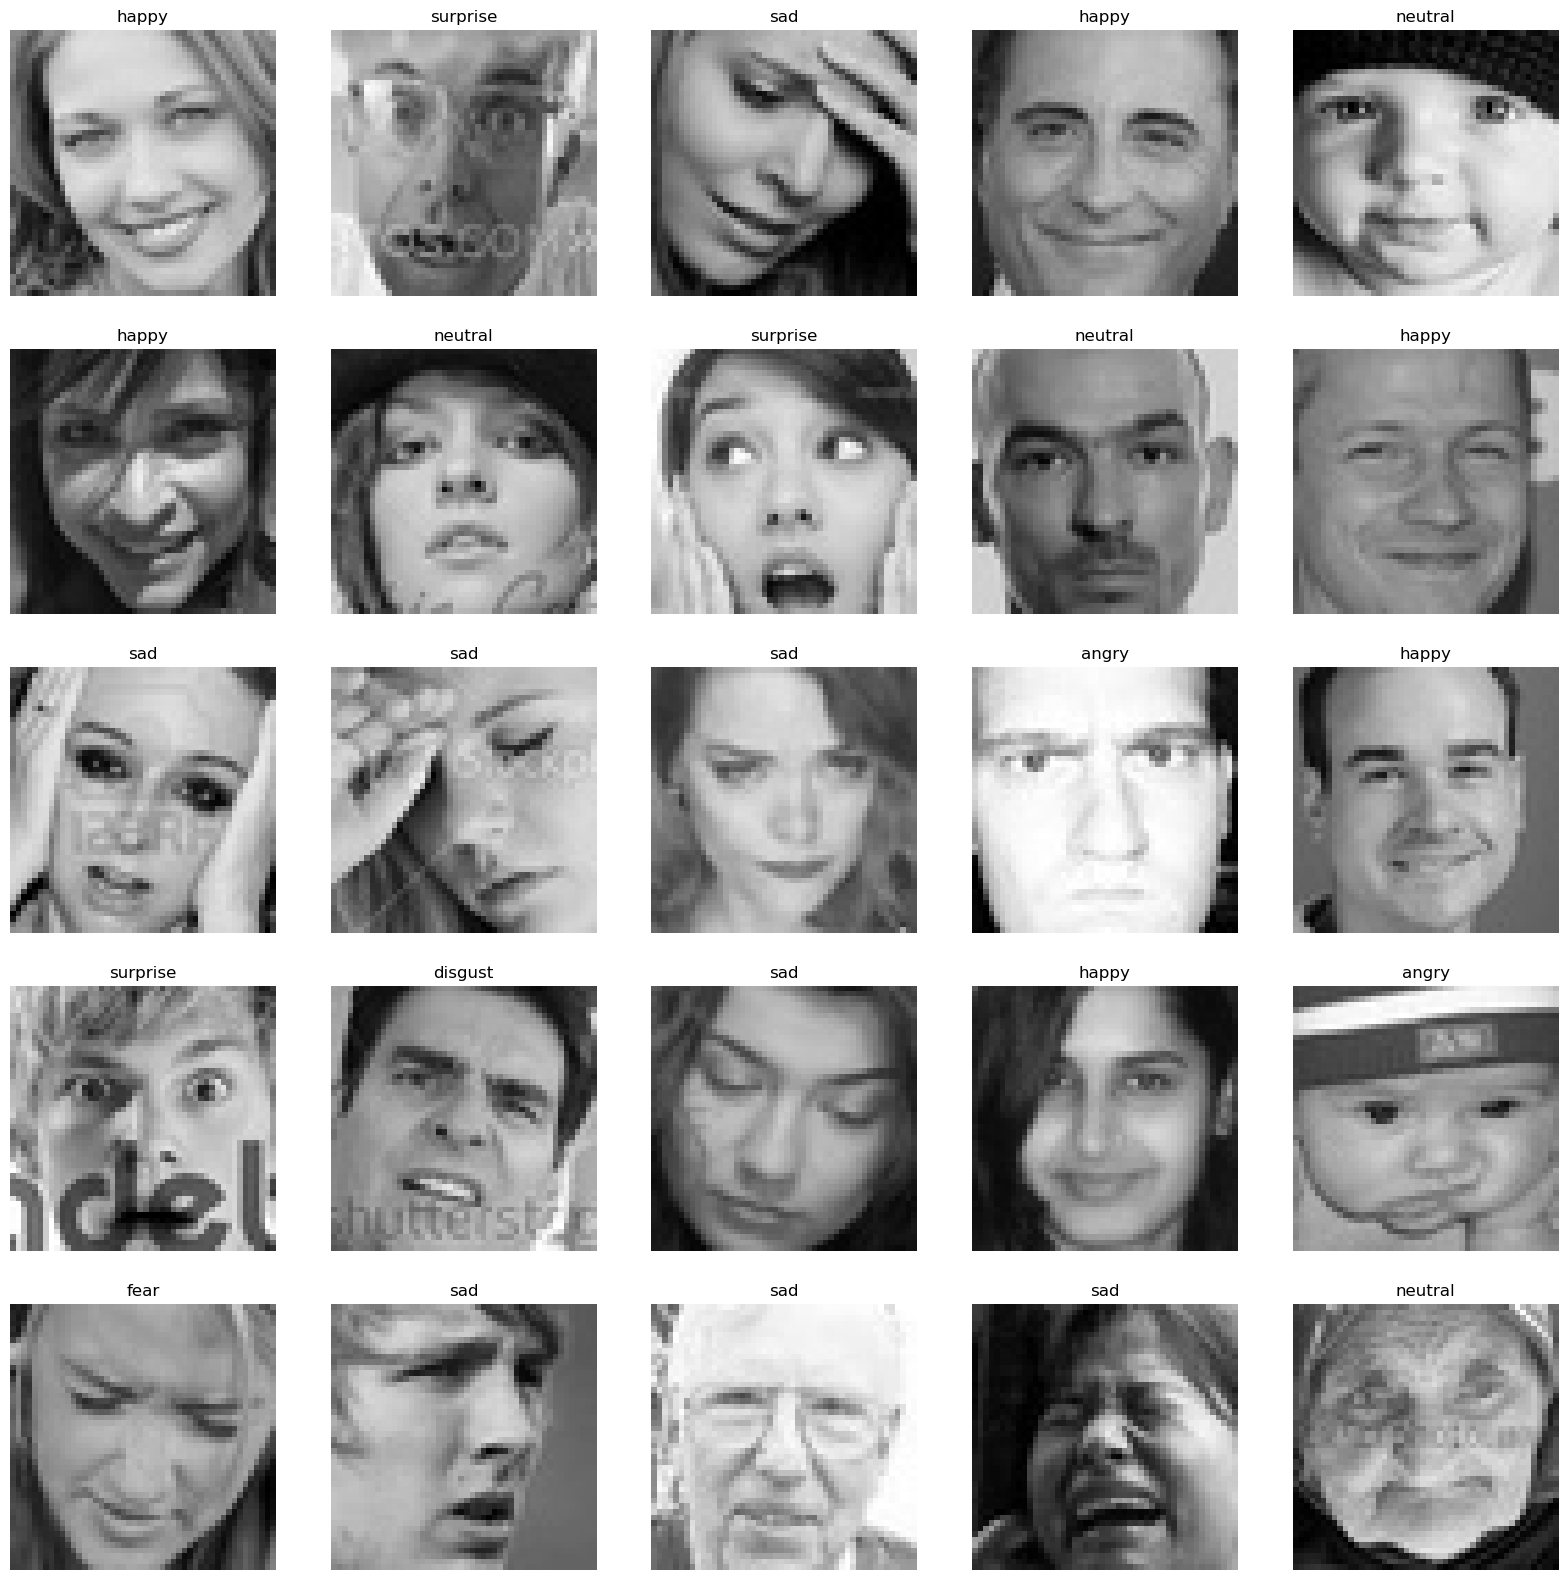

In [ ]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [ ]:
emotion_counts = train['label'].value_counts().reset_index()
emotion_counts.columns = ['label', 'image_count']
emotion_counts['label'] = emotion_counts['label']
emotion_counts

,label,image_count
0,happy,7164
1,neutral,4982
2,sad,4938
3,fear,4103
4,angry,3993
5,surprise,3205
6,disgust,436


In [ ]:
emotion_counts = val['label'].value_counts().reset_index()
emotion_counts.columns = ['label', 'image_count']
emotion_counts['label'] = emotion_counts['label']
emotion_counts

,label,image_count
0,happy,1825
1,neutral,1216
2,sad,1139
3,fear,1018
4,angry,960
5,surprise,797
6,disgust,111


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
IMG_SIZE = 48
BATCH_SIZE = 128


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## Model1- Simple Keras Model

In [ ]:
model = tf.keras.Sequential([
    #layer 1 followed by pooling 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
     #layer 2 followed by pooling 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # fully connected layer
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])


In [ ]:
#compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#Traiing
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // train_generator.batch_size,
    epochs=20)




Epoch 1/20
225/225 [==============================] - 375s 2s/step - loss: 1.6679 - accuracy: 0.3422 - val_loss: 1.5483 - val_accuracy: 0.4155
Epoch 2/20
225/225 [==============================] - 41s 180ms/step - loss: 1.4283 - accuracy: 0.4529 - val_loss: 1.3871 - val_accuracy: 0.4722
Epoch 3/20
225/225 [==============================] - 47s 208ms/step - loss: 1.3165 - accuracy: 0.5011 - val_loss: 1.3311 - val_accuracy: 0.4940
Epoch 4/20
225/225 [==============================] - 49s 218ms/step - loss: 1.2379 - accuracy: 0.5337 - val_loss: 1.3026 - val_accuracy: 0.5065
Epoch 5/20
225/225 [==============================] - 48s 215ms/step - loss: 1.1585 - accuracy: 0.5668 - val_loss: 1.2706 - val_accuracy: 0.5216
Epoch 6/20
225/225 [==============================] - 43s 192ms/step - loss: 1.0897 - accuracy: 0.5913 - val_loss: 1.2759 - val_accuracy: 0.5328
Epoch 7/20
225/225 [==============================] - 49s 219ms/step - loss: 1.0078 - accuracy: 0.6247 - val_loss: 1.2991 - val_accu

In [ ]:
model.evaluate(val_generator)


56/56 [==============================] - 7s 126ms/step - loss: 2.7748 - accuracy: 0.5208


[2.774812936782837, 0.5208038687705994]

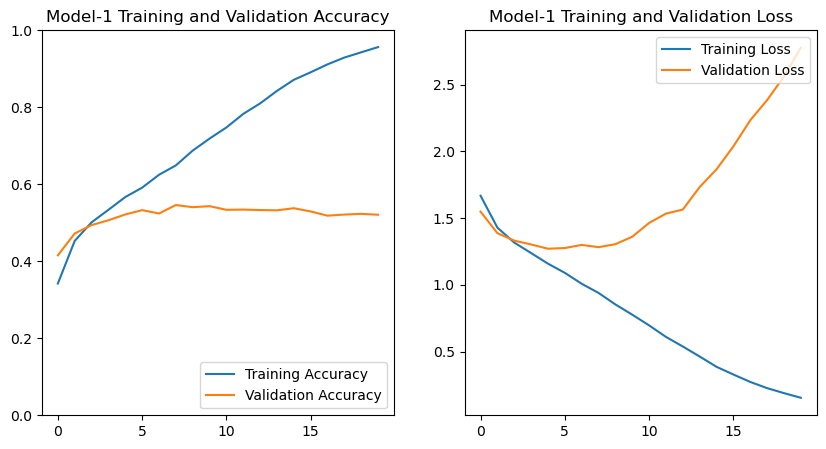

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =20
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.ylim(0, 1, 0.01)
plt.title('Model-1 Training and Validation Accuracy')
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
plt.title('Model-1 Training and Validation Loss')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')


## Model2 increasing convolutional pooling pairs

In [ ]:
model2 = tf.keras.Sequential([
    
    # pair 1
    tf.keras.layers.Conv2D(8, (3,3),  activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # pair 2
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # pair 3
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # pair 4
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #fully connected layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history2 = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=20)

Epoch 1/20
225/225 [==============================] - 15s 65ms/step - loss: 1.0140 - accuracy: 0.6172 - val_loss: 1.2933 - val_accuracy: 0.5230
Epoch 2/20
225/225 [==============================] - 15s 68ms/step - loss: 0.9975 - accuracy: 0.6214 - val_loss: 1.2778 - val_accuracy: 0.5324
Epoch 3/20
225/225 [==============================] - 17s 75ms/step - loss: 0.9838 - accuracy: 0.6270 - val_loss: 1.2818 - val_accuracy: 0.5371
Epoch 4/20
225/225 [==============================] - 18s 79ms/step - loss: 0.9769 - accuracy: 0.6296 - val_loss: 1.2845 - val_accuracy: 0.5375
Epoch 5/20
225/225 [==============================] - 20s 89ms/step - loss: 0.9655 - accuracy: 0.6368 - val_loss: 1.3156 - val_accuracy: 0.5259
Epoch 6/20
225/225 [==============================] - 18s 82ms/step - loss: 0.9515 - accuracy: 0.6422 - val_loss: 1.3034 - val_accuracy: 0.5338
Epoch 7/20
225/225 [==============================] - 19s 86ms/step - loss: 0.9414 - accuracy: 0.6470 - val_loss: 1.3026 - val_accuracy:

In [ ]:
model2.evaluate(val_generator)


56/56 [==============================] - 3s 54ms/step - loss: 1.4219 - accuracy: 0.5243


[1.4219201803207397, 0.5243419408798218]

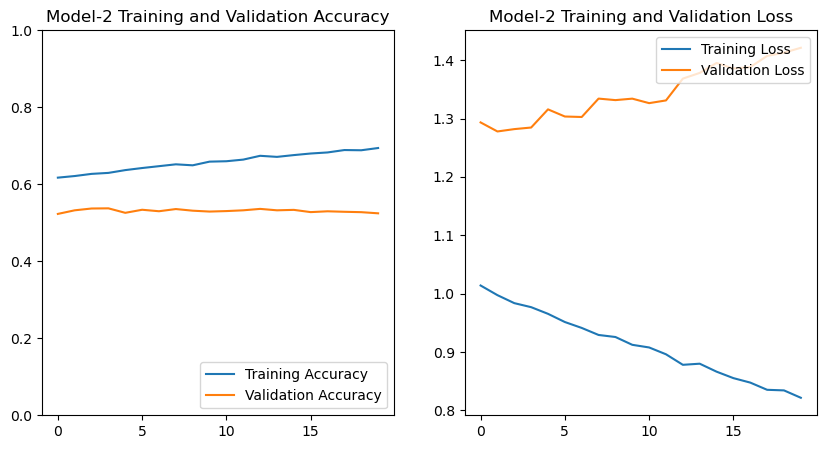

In [ ]:
import matplotlib.pyplot as plt

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs =20
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.ylim(0, 1, 0.01)
plt.title('Model-2 Training and Validation Accuracy')
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
plt.title('Model-2 Training and Validation Loss')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')

## Model 3 - Adding Dropout to improve the overfitting

In [ ]:
from tensorflow.keras.layers import Dropout
model3 = tf.keras.Sequential([
    
    # layer -1 convolution layer followed by pooling layer and dropout percentage 
    tf.keras.layers.Conv2D(32, kernel_size=5,  padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    
    # layer -2 convolution layer followed by pooling layer and dropout percentage 
    tf.keras.layers.Conv2D(64,kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    
    # layer -3 convolution layer followed by pooling layer and dropout percentage 
    tf.keras.layers.Conv2D(128,kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    
    # layer -4 convolution layer followed by pooling layer and dropout percentage 
    tf.keras.layers.Conv2D(256,kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    
    #fully connected layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])


"\nfrom tensorflow.keras.layers import Dropout\n\n# Add dropout layers to the model\nmodel3 = Sequential()\nmodel3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))\nmodel3.add(Conv2D(64, (3, 3), activation='relu'))\nmodel3.add(MaxPooling2D(pool_size=(2, 2)))\nmodel3.add(Dropout(0.25))\nmodel3.add(Conv2D(128, (3, 3), activation='relu'))\nmodel3.add(MaxPooling2D(pool_size=(2, 2)))\nmodel3.add(Dropout(0.25))\nmodel3.add(Flatten())\nmodel3.add(Dense(64, activation='relu'))\nmodel3.add(Dropout(0.5))\nmodel3.add(Dense(7, activation='softmax'))\n\n# Compile the model\nmodel3.compile(loss='categorical_crossentropy',\n              optimizer='adam',\n              metrics=['accuracy'])\n\n# Train the model with dropout\nhistory3 = model3.fit(\n    train_generator,\n    steps_per_epoch=train_generator.samples // BATCH_SIZE,\n    validation_data=val_generator,\n    validation_steps=val_generator.samples // BATCH_SIZE,\n    epochs=20)\n"

In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history3 = model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=20)

Epoch 1/20
225/225 [==============================] - 149s 651ms/step - loss: 1.8142 - accuracy: 0.2488 - val_loss: 1.7883 - val_accuracy: 0.2675
Epoch 2/20
225/225 [==============================] - 129s 573ms/step - loss: 1.7005 - accuracy: 0.3186 - val_loss: 1.5653 - val_accuracy: 0.3932
Epoch 3/20
225/225 [==============================] - 132s 586ms/step - loss: 1.5452 - accuracy: 0.3989 - val_loss: 1.4481 - val_accuracy: 0.4445
Epoch 4/20
225/225 [==============================] - 137s 607ms/step - loss: 1.4421 - accuracy: 0.4422 - val_loss: 1.3589 - val_accuracy: 0.4767
Epoch 5/20
225/225 [==============================] - 140s 623ms/step - loss: 1.3739 - accuracy: 0.4732 - val_loss: 1.3080 - val_accuracy: 0.5001
Epoch 6/20
225/225 [==============================] - 143s 635ms/step - loss: 1.3238 - accuracy: 0.4917 - val_loss: 1.2547 - val_accuracy: 0.5226
Epoch 7/20
225/225 [==============================] - 143s 637ms/step - loss: 1.2650 - accuracy: 0.5158 - val_loss: 1.2158 -

In [ ]:
#model evaluate
model3.evaluate(val_generator)

56/56 [==============================] - 6s 102ms/step - loss: 1.0984 - accuracy: 0.5948


[1.0984387397766113, 0.5948202610015869]

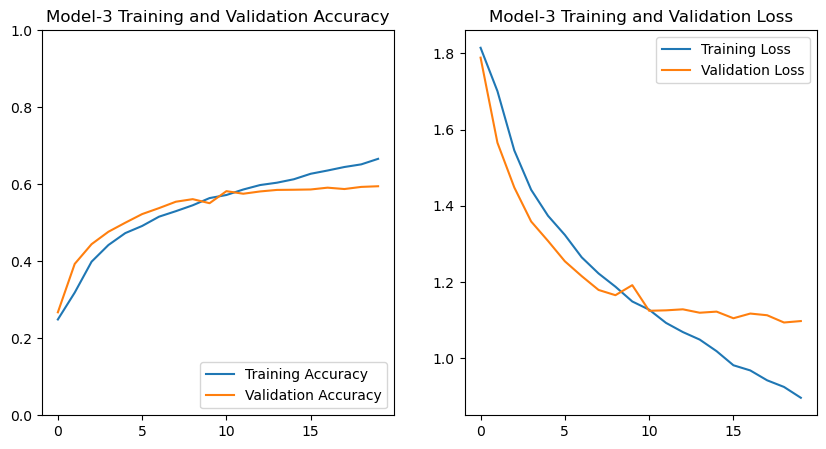

In [ ]:
import matplotlib.pyplot as plt

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs =20
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.ylim(0, 1, 0.01)
plt.title('Model-3 Training and Validation Accuracy')
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
plt.title('Model-3 Training and Validation Loss')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')


## Model 4 - Incresing the epoch value

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization
model4 = tf.keras.Sequential([
    
    #layer 1
    tf.keras.layers.Conv2D(32, kernel_size=5,  padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    
    #layer 2
    tf.keras.layers.Conv2D(64,kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    
    #layer 3
    tf.keras.layers.Conv2D(128,kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    
    #layer 4
    tf.keras.layers.Conv2D(256,kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    
    #fully connected layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [ ]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history4 = model4.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=48)

Epoch 1/48
225/225 [==============================] - 126s 555ms/step - loss: 1.8438 - accuracy: 0.2884 - val_loss: 1.8120 - val_accuracy: 0.2428
Epoch 2/48
225/225 [==============================] - 141s 625ms/step - loss: 1.5453 - accuracy: 0.3964 - val_loss: 1.6460 - val_accuracy: 0.3483
Epoch 3/48
225/225 [==============================] - 150s 668ms/step - loss: 1.4080 - accuracy: 0.4563 - val_loss: 1.4461 - val_accuracy: 0.4450
Epoch 4/48
225/225 [==============================] - 151s 669ms/step - loss: 1.3162 - accuracy: 0.4922 - val_loss: 1.4194 - val_accuracy: 0.4675
Epoch 5/48
225/225 [==============================] - 149s 664ms/step - loss: 1.2551 - accuracy: 0.5182 - val_loss: 1.3055 - val_accuracy: 0.5001
Epoch 6/48
225/225 [==============================] - 152s 674ms/step - loss: 1.1894 - accuracy: 0.5508 - val_loss: 1.2600 - val_accuracy: 0.5226
Epoch 7/48
225/225 [==============================] - 155s 687ms/step - loss: 1.1385 - accuracy: 0.5683 - val_loss: 1.2411 -

"\n# Plotting the training and validation accuracy\nplt.plot(history4.history4['accuracy'])\nplt.plot(history4.history4['val_accuracy'])\nplt.title('Model Accuracy')\nplt.ylabel('Accuracy')\nplt.xlabel('Epoch')\nplt.legend(['Train', 'Val'], loc='upper left')\nplt.show()\n\n# Plotting the training and validation loss\nplt.plot(history4.history4['loss'])\nplt.plot(history4.history4['val_loss'])\nplt.title('Model Loss')\nplt.ylabel('Loss')\nplt.xlabel('Epoch')\nplt.legend(['Train', 'Val'], loc='upper left')\nplt.show()\n"

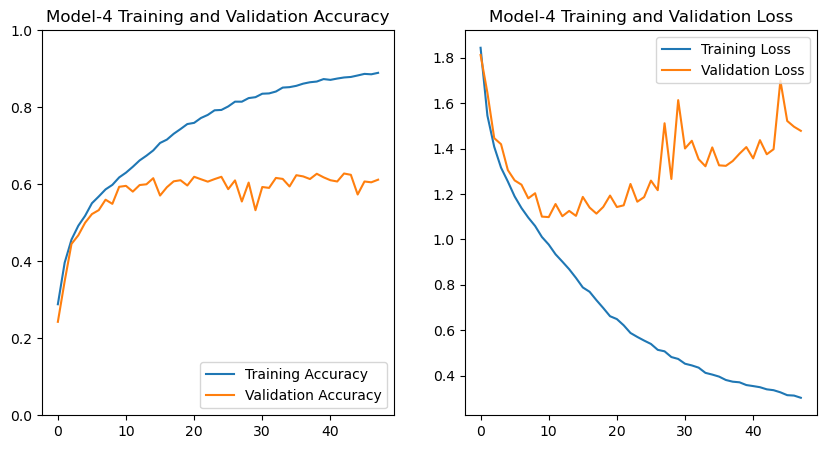

In [ ]:
import matplotlib.pyplot as plt

epochs=48
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1, 0.01)
plt.title('Model-4 Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model-4 Training and Validation Loss')


## Bar plot for 4 models

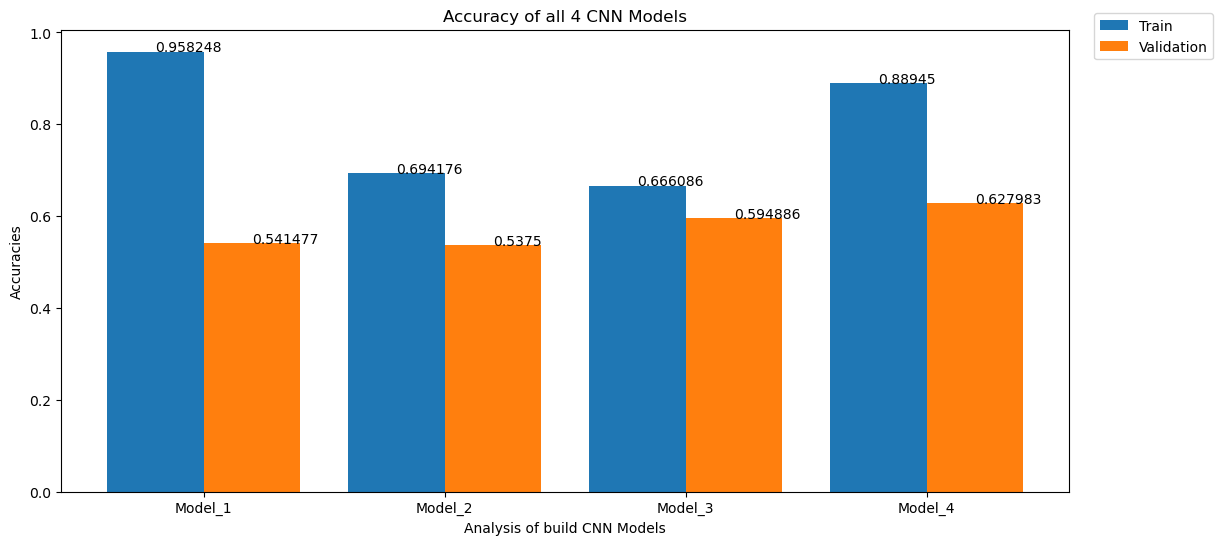

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
models=4
def addlabels(x,y,z):
    for i in range(len(x)):
        plt.text(i + z,y[i],y[i])

val_m1 = round(max(history.history['val_accuracy']), 6)
val_m2 = round(max(history2.history['val_accuracy']), 6)
val_m3 = round(max(history3.history['val_accuracy']), 6)
val_m4 = round(max(history4.history['val_accuracy']), 6)

train_m1 = round(max(history.history['accuracy']), 6)
train_m2 = round(max(history2.history['accuracy']), 6)
train_m3 = round(max(history3.history['accuracy']), 6)
train_m4 = round(max(history4.history['accuracy']), 6)

val_data = {'Model_1':val_m1, 'Model_2':val_m2,'Model_3':val_m3,'Model_4':val_m4}
train_data = {'Model_1':train_m1, 'Model_2':train_m2,'Model_3':train_m3,'Model_4':train_m4}

models = list(train_data.keys())
val_accuracies = list(val_data.values())
train_accuracies = list(train_data.values())
X_axis = np.arange(len(models))
fig = plt.figure(figsize = (13, 6))
 
# creating the bar plot
plt.bar(X_axis - 0.2, train_accuracies, width = 0.4, label="Train")
plt.bar(X_axis + 0.2, val_accuracies, width = 0.4, label="Validation")
addlabels(models, train_accuracies, -0.2)
addlabels(models, val_accuracies, +0.2)
plt.xticks(X_axis, models)
plt.xlabel("Analysis of build CNN Models")
plt.ylabel("Accuracies")
plt.title("Accuracy of all 4 CNN Models")
plt.legend(bbox_to_anchor=(1.15, 1.05))
plt.show()


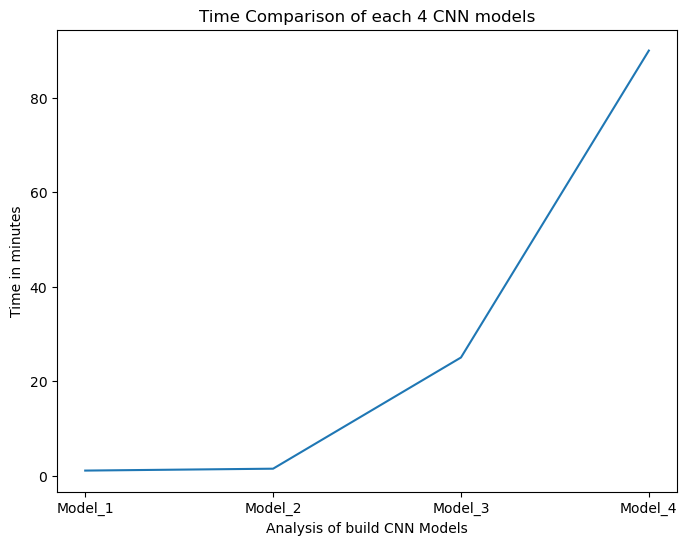

In [ ]:
time_data = {'Model_1': 1.05, 'Model_2':1.45,'Model_3':25,'Model_4':90}
models = list(time_data.keys())
timings = list(time_data.values())
X_axis = np.arange(len(models))
fig = plt.figure(figsize = (8, 6))
 
# creating the bar plot
plt.plot(models, timings)

plt.xticks(X_axis, models)
plt.xlabel("Analysis of build CNN Models")
plt.ylabel("Time in minutes")
plt.title("Time Comparison of each 4 CNN models")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout

# Taken the defined array size for neurons, no.of layers and conv2d shapes
neurons_per_layer = [[100, 200, 100], [200, 300, 100]]
num_layers = [2, 3]
conv2d_shape = [(3,3), (5,5), (7,7)]


# Defined a function to create and train the model with different hyperparameters
def train_model(neurons, num_layers, conv2d_shape):
    # Define the model architecture
    model_exp = tf.keras.models.Sequential()
    model_exp.add(tf.keras.layers.Conv2D(64, conv2d_shape, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model_exp.add(tf.keras.layers.MaxPooling2D(2, 2))
    model_exp.add(tf.keras.layers.Dropout(0.3))
    
    # Activation function
    for i in range(num_layers):
        model_exp.add(tf.keras.layers.Dense(neurons[i], activation='relu'))

    # Fully connected layer
    model_exp.add(tf.keras.layers.Flatten())
    model_exp.add(tf.keras.layers.Dense(7, activation='softmax'))

    # Compile
    model_exp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Training
    history_exp = model_exp.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // BATCH_SIZE,
        validation_data=val_generator,
        validation_steps=val_generator.samples // BATCH_SIZE,
        epochs=10,
        verbose=0)
    
    return history_exp, model_exp



Training model with neurons: [100, 200, 100] num_layers: 2 conv2d_shape: (3, 3)
Validation Accuracy: 0.5009943246841431


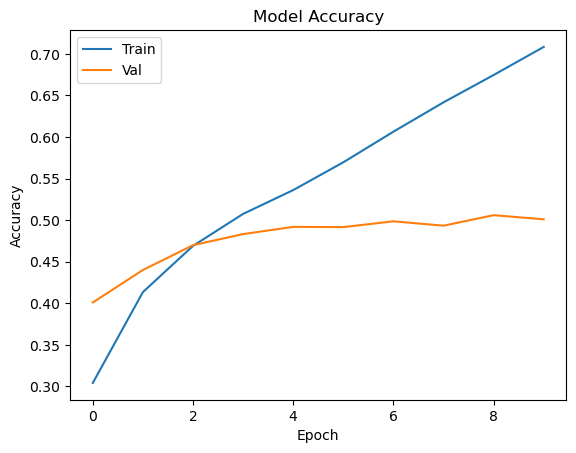

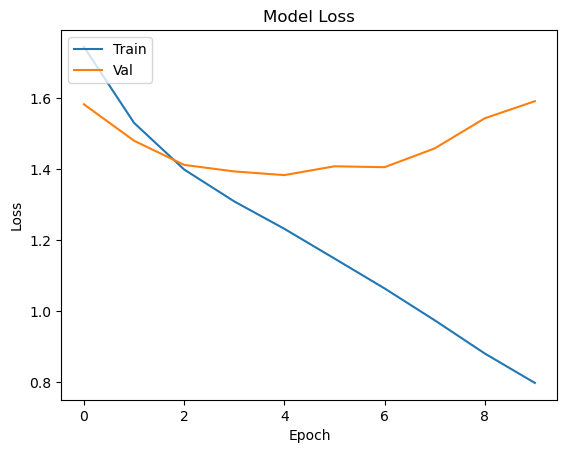

Training model with neurons: [100, 200, 100] num_layers: 2 conv2d_shape: (5, 5)
Validation Accuracy: 0.49446022510528564


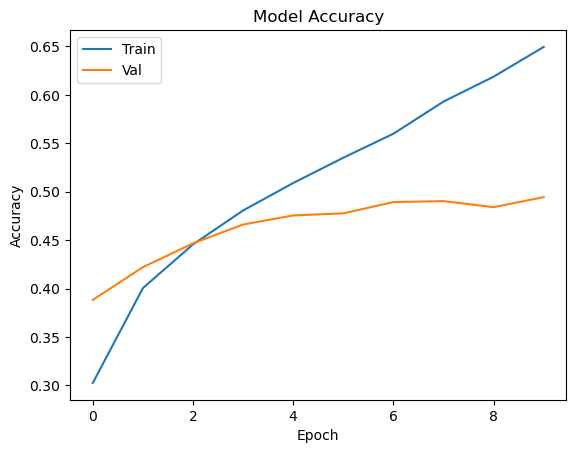

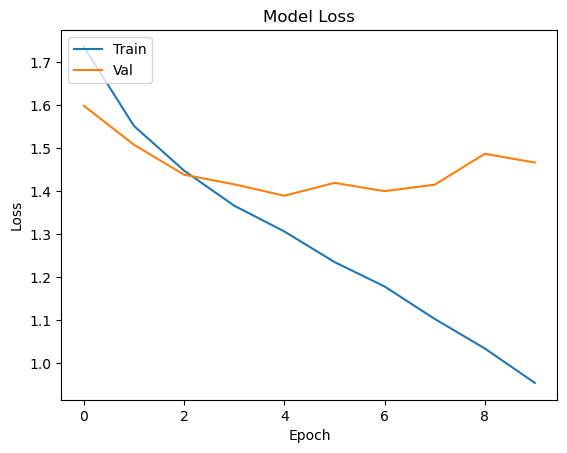

Training model with neurons: [100, 200, 100] num_layers: 2 conv2d_shape: (7, 7)
Validation Accuracy: 0.45411932468414307


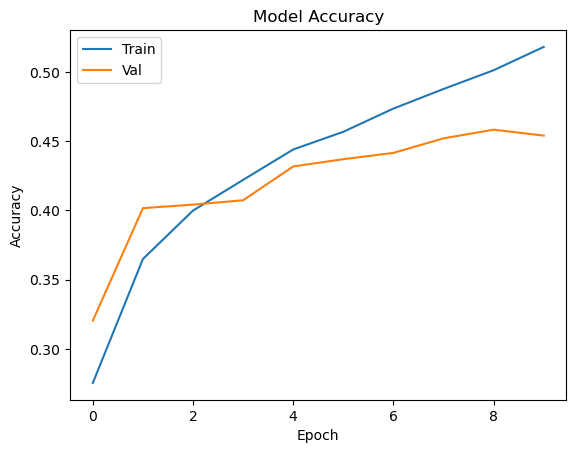

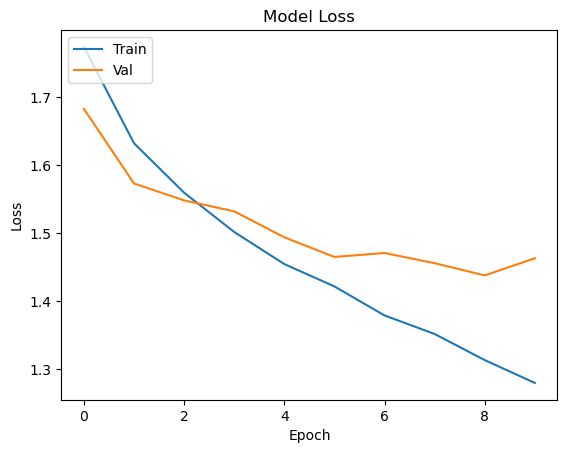

Training model with neurons: [100, 200, 100] num_layers: 3 conv2d_shape: (3, 3)
Validation Accuracy: 0.47613635659217834


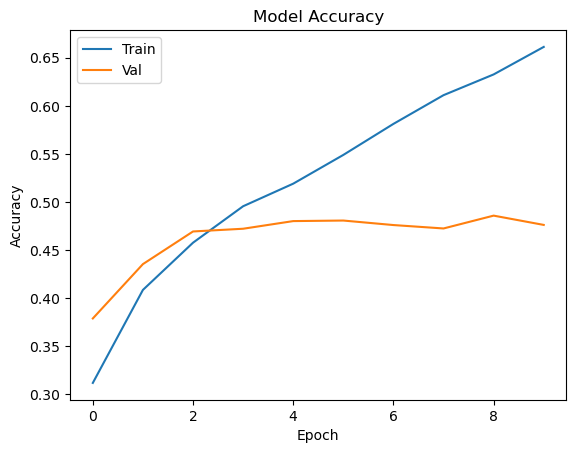

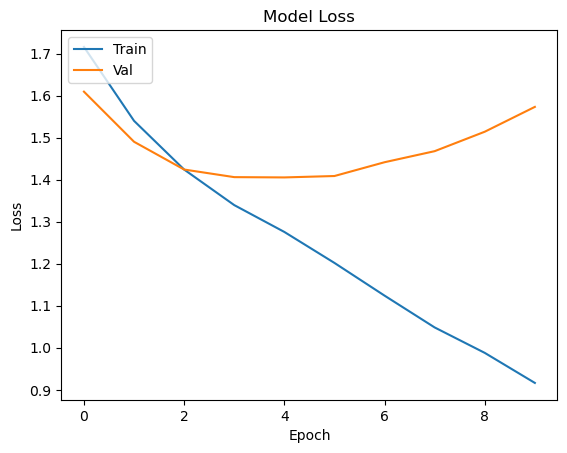

Training model with neurons: [100, 200, 100] num_layers: 3 conv2d_shape: (5, 5)
Validation Accuracy: 0.4801136255264282


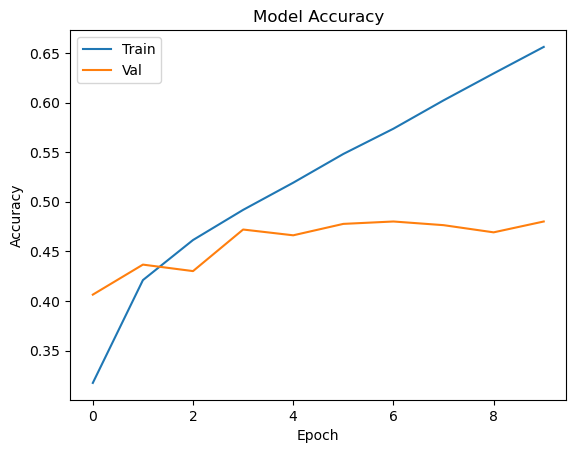

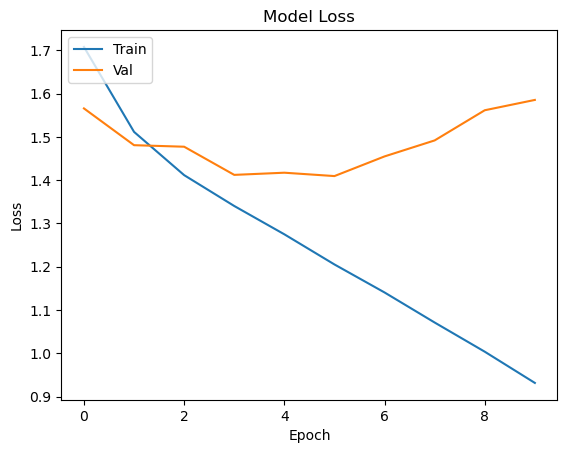

Training model with neurons: [100, 200, 100] num_layers: 3 conv2d_shape: (7, 7)
Validation Accuracy: 0.4617897868156433


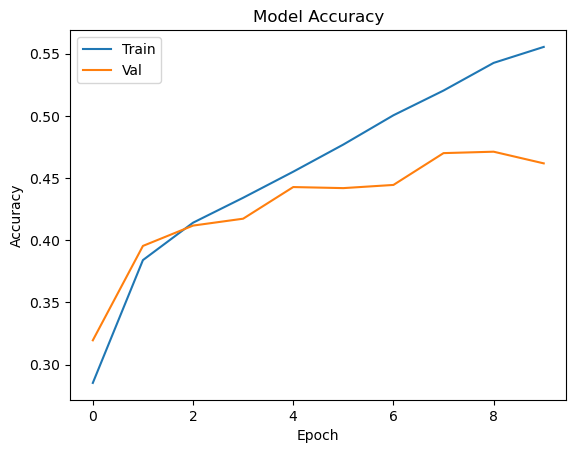

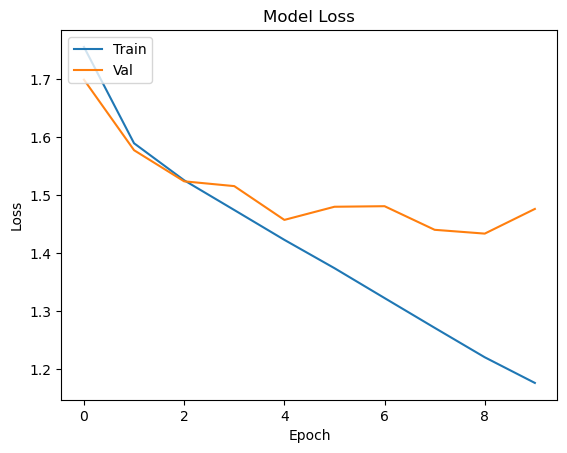

Training model with neurons: [200, 300, 100] num_layers: 2 conv2d_shape: (3, 3)
Validation Accuracy: 0.49588069319725037


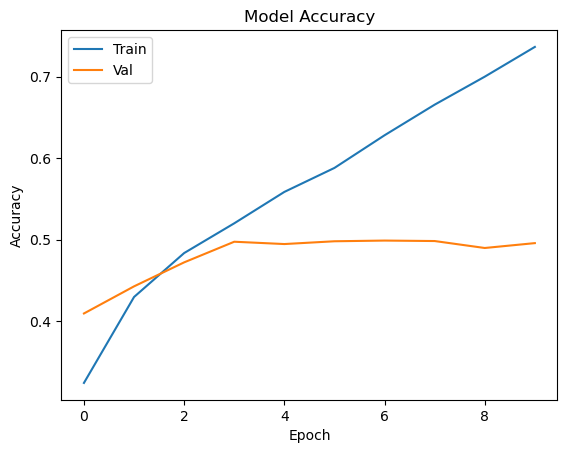

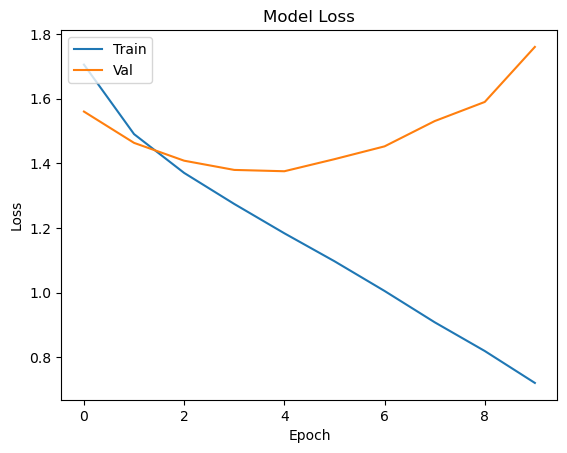

Training model with neurons: [200, 300, 100] num_layers: 2 conv2d_shape: (5, 5)
Validation Accuracy: 0.48536932468414307


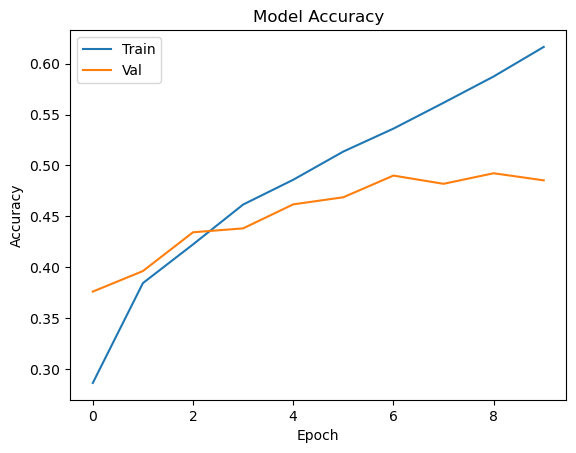

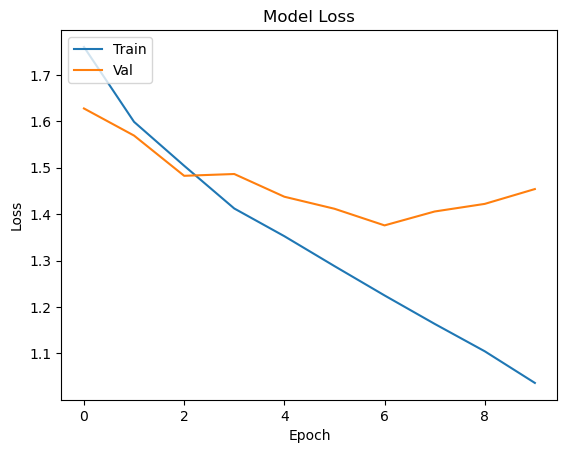

Training model with neurons: [200, 300, 100] num_layers: 2 conv2d_shape: (7, 7)
Validation Accuracy: 0.4546875059604645


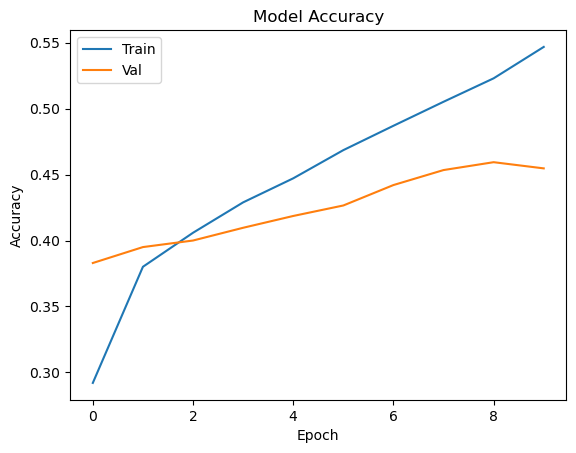

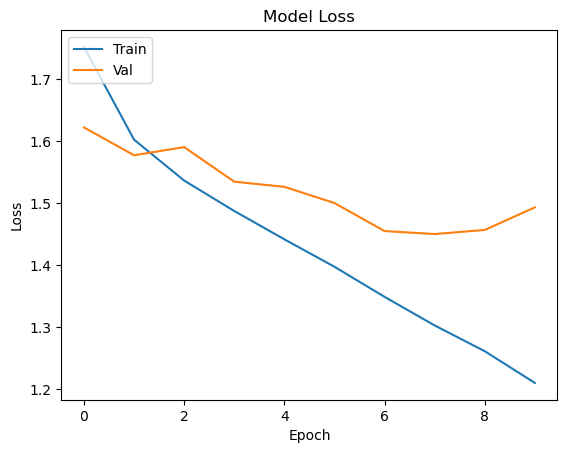

Training model with neurons: [200, 300, 100] num_layers: 3 conv2d_shape: (3, 3)
Validation Accuracy: 0.4906249940395355


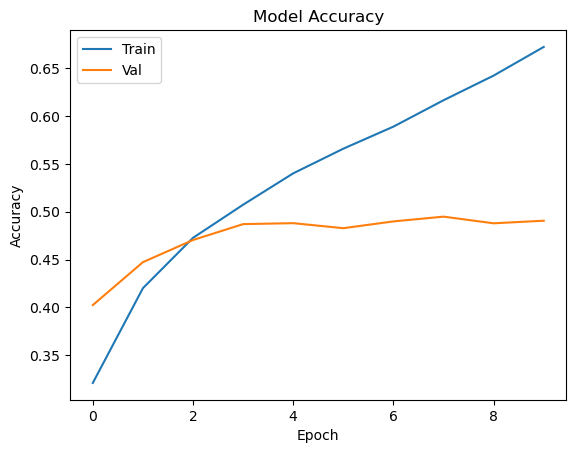

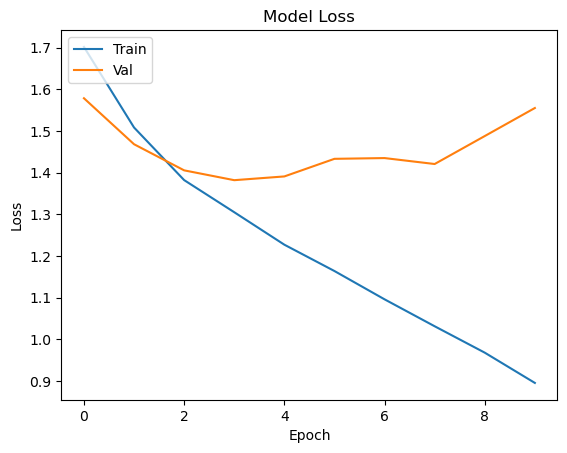

Training model with neurons: [200, 300, 100] num_layers: 3 conv2d_shape: (5, 5)
Validation Accuracy: 0.4609375


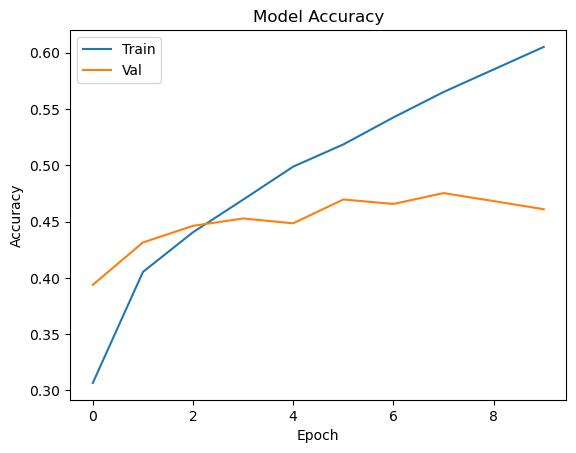

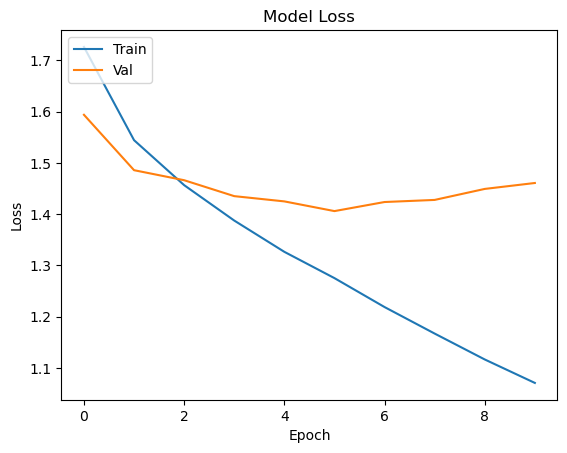

Training model with neurons: [200, 300, 100] num_layers: 3 conv2d_shape: (7, 7)
Validation Accuracy: 0.44943180680274963


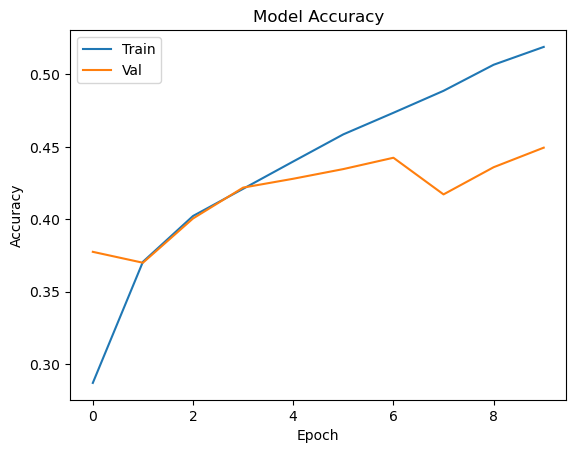

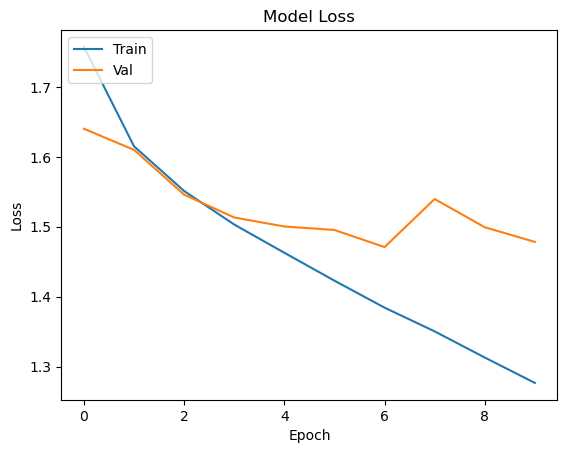

In [ ]:
# Train and plot the models for each combination of hyperparameters
for neurons in neurons_per_layer:
    for num_layer in num_layers:
        for conv2d in conv2d_shape:
            print("Training model with neurons:", neurons, "num_layers:", num_layer, "conv2d_shape:", conv2d)
            history_exp, model_exp = train_model(neurons, num_layer, conv2d)
            val_acc = history_exp.history['val_accuracy'][-1]
            print("Validation Accuracy:", val_acc)
            
            # Plotting the training and validation accuracy
            plt.plot(history_exp.history['accuracy'])
            plt.plot(history_exp.history['val_accuracy'])
            plt.title('Model Accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Val'], loc='upper left')
            plt.show()

            # Plotting the training and validation loss
            plt.plot(history_exp.history['loss'])
            plt.plot(history_exp.history['val_loss'])
            plt.title('Model Loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Val'], loc='upper left')
            plt.show()
